In [3]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

In [4]:
import cv2 as cv

In [5]:
import torch

In [6]:
device = torch.device("cuda")

In [7]:
BODY_PARTS = { "Nose": 0, "Neck": 1, "RShoulder": 2, "RElbow": 3, "RWrist": 4,
               "LShoulder": 5, "LElbow": 6, "LWrist": 7, "RHip": 8, "RKnee": 9,
               "RAnkle": 10, "LHip": 11, "LKnee": 12, "LAnkle": 13, "REye": 14,
               "LEye": 15, "REar": 16, "LEar": 17, "Background": 18 }

POSE_PAIRS = [ ["Neck", "RShoulder"], ["Neck", "LShoulder"], ["RShoulder", "RElbow"],
               ["RElbow", "RWrist"], ["LShoulder", "LElbow"], ["LElbow", "LWrist"],
               ["Neck", "RHip"], ["RHip", "RKnee"], ["RKnee", "RAnkle"], ["Neck", "LHip"],
               ["LHip", "LKnee"], ["LKnee", "LAnkle"], ["Neck", "Nose"], ["Nose", "REye"],
               ["REye", "REar"], ["Nose", "LEye"], ["LEye", "LEar"] ]

In [8]:
img = cv.imread(cv.samples.findFile("./img.png"))

In [9]:
net = cv.dnn.readNetFromTensorflow("graph_opt.pb")

In [10]:
cap = cv.VideoCapture("./image.jpg")

In [11]:
hasFrame, frame = cap.read()

In [12]:
hasFrame

True

In [13]:
frame

array([[[226, 226, 226],
        [226, 226, 226],
        [226, 226, 226],
        ...,
        [226, 226, 226],
        [226, 226, 226],
        [226, 226, 226]],

       [[226, 226, 226],
        [226, 226, 226],
        [226, 226, 226],
        ...,
        [226, 226, 226],
        [226, 226, 226],
        [226, 226, 226]],

       [[226, 226, 226],
        [226, 226, 226],
        [226, 226, 226],
        ...,
        [226, 226, 226],
        [226, 226, 226],
        [226, 226, 226]],

       ...,

       [[225, 225, 225],
        [225, 225, 225],
        [225, 225, 225],
        ...,
        [222, 222, 222],
        [222, 222, 222],
        [222, 222, 222]],

       [[225, 225, 225],
        [225, 225, 225],
        [225, 225, 225],
        ...,
        [221, 221, 221],
        [221, 221, 221],
        [221, 221, 221]],

       [[225, 225, 225],
        [225, 225, 225],
        [225, 225, 225],
        ...,
        [221, 221, 221],
        [221, 221, 221],
        [221, 221, 221]]

In [14]:
net.setInput(cv.dnn.blobFromImage(frame, 1.0, (368, 368), (127.5, 127.5, 127.5), swapRB=True, crop=False))

In [15]:
out = net.forward()

In [16]:
out = out[:, :19, :, :]

In [17]:
len(BODY_PARTS)

19

In [18]:
out.shape[1]

19

In [19]:
points = []
for i in range(len(BODY_PARTS)):
    heat_map = out[0, i, :, :]

    _, conf, _, point = cv.minMaxLoc(heat_map)
    x = (368 / point[0]) / out.shape[3]
    y = (368 / point[1]) / out.shape[2]
    points.append((int(x), int(y)) if conf > 0.2 else None)

In [20]:
for partFrom, partTo in POSE_PAIRS:
    idFrom = BODY_PARTS.get(partFrom)
    idTo = BODY_PARTS.get(partTo)

    if idFrom and idTo:
        cv.line(frame, points[idFrom], points[idTo], (0, 255, 0), 3)
        cv.ellipse(frame, points[idFrom], (3, 3), 0, 0, 360, (0, 0, 255), cv.FILLED)
        cv.ellipse(frame, points[idTo], (3, 3), 0, 0, 360, (0, 0, 255), cv.FILLED)

In [24]:
cv.putText(frame, '%.2fms' % (80 / 4), (10, 20), cv.FONT_HERSHEY_SIMPLEX, 0.5, (0, 0, 0))

array([[[  0,   0, 255],
        [  0,   0, 255],
        [  0,   0, 255],
        ...,
        [226, 226, 226],
        [226, 226, 226],
        [226, 226, 226]],

       [[  0,   0, 255],
        [  0,   0, 255],
        [  0,   0, 255],
        ...,
        [226, 226, 226],
        [226, 226, 226],
        [226, 226, 226]],

       [[  0,   0, 255],
        [  0,   0, 255],
        [  0,   0, 255],
        ...,
        [226, 226, 226],
        [226, 226, 226],
        [226, 226, 226]],

       ...,

       [[225, 225, 225],
        [225, 225, 225],
        [225, 225, 225],
        ...,
        [222, 222, 222],
        [222, 222, 222],
        [222, 222, 222]],

       [[225, 225, 225],
        [225, 225, 225],
        [225, 225, 225],
        ...,
        [221, 221, 221],
        [221, 221, 221],
        [221, 221, 221]],

       [[225, 225, 225],
        [225, 225, 225],
        [225, 225, 225],
        ...,
        [221, 221, 221],
        [221, 221, 221],
        [221, 221, 221]]

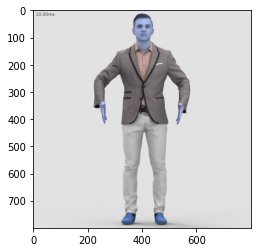

In [25]:
plt.imshow(frame)

In [26]:
cv.imshow('OpenPose using OpenCV', frame)